In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('clustering rakamin.csv')

df.head()

,customerid,age,gender,marital_status,income,spending_score
0,128,0,1,Married,677,2946.39
1,12,2,1,Married,494,5825.77
2,74,3,1,Married,509,1816.27
3,366,18,0,Single,0,4710.53
4,164,18,1,Single,0,2967.53


In [23]:
df.shape

(447, 6)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerid      447 non-null    int64  
 1   age             447 non-null    int64  
 2   gender          447 non-null    int64  
 3   marital_status  444 non-null    object 
 4   income          447 non-null    int64  
 5   spending_score  447 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 21.1+ KB


In [25]:
df.describe()

,customerid,age,gender,income,spending_score
count,447.000000,447.000000,447.000000,447.000000,447.000000
mean,224.000000,39.782998,0.458613,789.948546,3625.644653
std,129.182042,12.848719,0.498842,572.558145,1246.485506
min,1.000000,0.000000,0.000000,0.000000,921.130000
25%,112.500000,30.000000,0.000000,362.500000,2717.925000
50%,224.000000,39.000000,0.000000,687.000000,3542.530000
75%,335.500000,50.500000,1.000000,1062.000000,4412.655000
max,447.000000,72.000000,1.000000,3578.000000,8467.950000


# **Data Cleansing**

In [26]:
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

In [27]:
df.isnull().sum()

customerid        0
age               0
gender            0
marital_status    3
income            0
spending_score    0
dtype: int64

In [28]:
df.dropna(subset=['marital_status'])

,customerid,age,gender,marital_status,income,spending_score
0,128,0,1,Married,677,2946.39
1,12,2,1,Married,494,5825.77
2,74,3,1,Married,509,1816.27
3,366,18,0,Single,0,4710.53
4,164,18,1,Single,0,2967.53
...,...,...,...,...,...,...
442,39,66,1,Married,619,4224.64
443,206,68,0,Married,83,4140.56
444,352,69,0,Single,615,3408.58
445,334,70,0,Married,599,1896.37


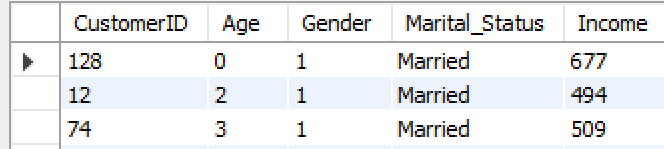

In [29]:
indexCustId = df[ (df['customerid'] == 128) | (df['customerid'] == 12) | (df['customerid'] == 74)].index

df.drop(indexCustId , inplace=True)

# Age and Spending Score

In [30]:
age_18_25 = df['age'][(df.age >=18) & (df.age <= 25)]
age_26_35 = df.age[(df.age >=26) & (df.age <= 35)]
age_36_45 = df.age[(df.age >=36) & (df.age <= 45)]
age_46_55 = df.age[(df.age >=46) & (df.age <= 55)]
age_55above = df.age[df.age >=56]

In [31]:
agex = ["18-25","26-35","36-45","46-55","56+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

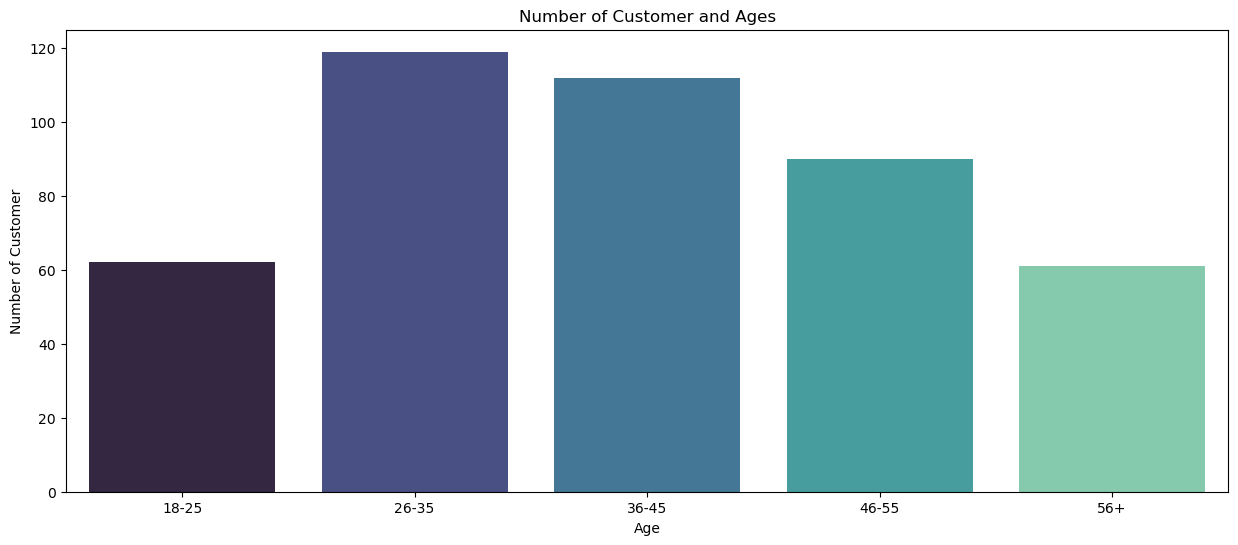

In [32]:
plt.figure(1, figsize=(15,6))                        # Plotting the Graph


sns.barplot(x=agex, y=agey, palette = 'mako')

plt.title('Number of Customer and Ages')

plt.xlabel('Age')

plt.ylabel('Number of Customer')

plt.show()

In [33]:
X1 = df.loc[:,['age','spending_score']].values

age_ss = []

for k in range(1,8):

    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X1)
    age_ss.append(kmeans.inertia_)

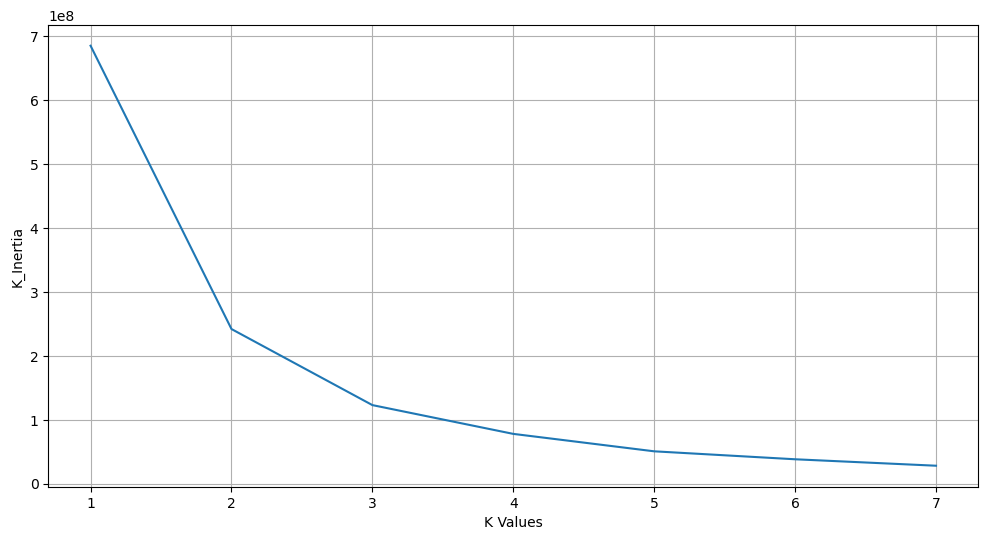

In [34]:
plt.figure(figsize=(12,6))

plt.grid()

plt.plot(range(1,8),age_ss)

plt.xlabel('K Values')
plt.ylabel("K_Inertia")

plt.show()

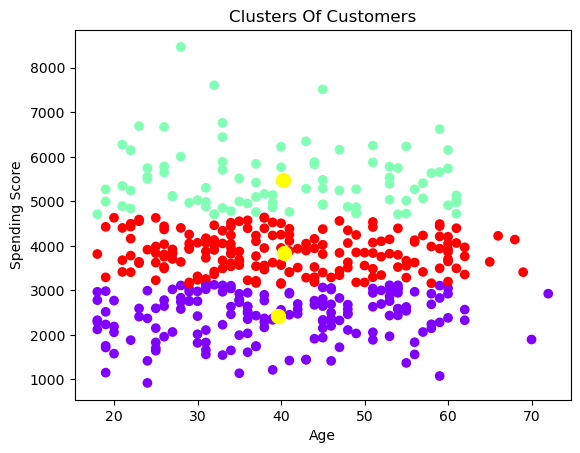

In [35]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(X1)

plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters Of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

# **Income and Spending Score**

In [36]:
X= df.iloc[:, [4,5]].values

In [37]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

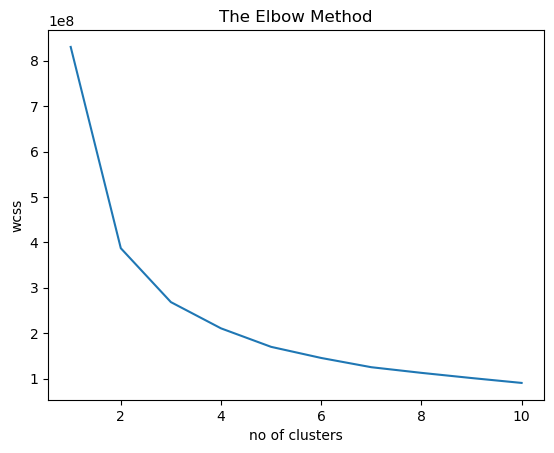

In [38]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [39]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

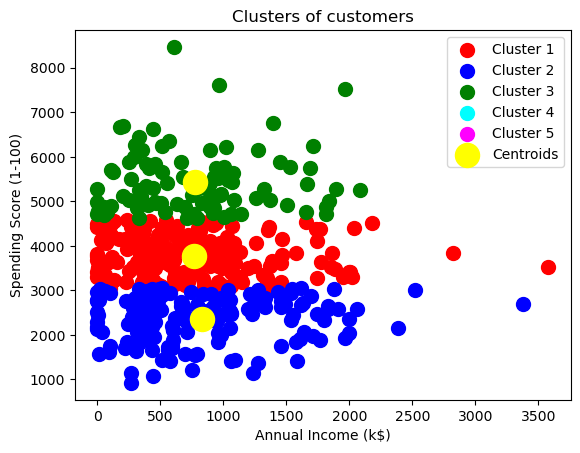

In [40]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()